#Uber Fares Prediction

##Description

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:

*   key - a unique identifier for each trip

*   fare_amount - the cost of each trip in usd


*   pickup_datetime - date and time when the meter was engaged

*   passenger_count - the number of passengers in the vehicle (driver entered value)


*   pickup_longitude - the longitude where the meter was engaged

*   pickup_latitude - the latitude where the meter was engaged


*   dropoff_longitude - the longitude where the meter was disengaged

*   dropoff_latitude - the latitude where the meter was disengaged


###Objective :


*   Understand the Dataset & cleanup (if required).
*   Build Regression models to predict the fare price of uber ride.


*   Deploy the regression model with streamlit




### Data Source : https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

#Libraries

In [1]:
pip install haversine

In [2]:
#Importing libraries

import haversine as hs
from haversine import Unit
import math
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [3]:
df = pd.read_csv("https://github.com/A-Arthur-A/Digital_Skola_Final_Project/raw/main/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df["key"] = pd.to_datetime(df["key"], format = "%Y-%m-%d %H:%M:%S")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format = "%Y-%m-%d %H:%M:%S UTC")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5


#Data Exploration

In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         200000 non-null  int64         
 1   key                200000 non-null  datetime64[ns]
 2   fare_amount        200000 non-null  float64       
 3   pickup_datetime    200000 non-null  datetime64[ns]
 4   pickup_longitude   200000 non-null  float64       
 5   pickup_latitude    200000 non-null  float64       
 6   dropoff_longitude  199999 non-null  float64       
 7   dropoff_latitude   199999 non-null  float64       
 8   passenger_count    200000 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 13.7 MB


In [10]:
#dataframe for EDA

df_dt = df.copy()

In [11]:
df_dt['year'] = df_dt.pickup_datetime.dt.year
df_dt['month'] = df_dt.pickup_datetime.dt.month

In [12]:
#Column for year-month

df_dt["pickup_ym"] = df_dt['pickup_datetime'].dt.strftime('%Y-%m')
df_dt["pickup_ym"] = pd.to_datetime(df_dt["pickup_ym"], format = "%Y-%m")

###Lineplot of cumulative fare amount for each year

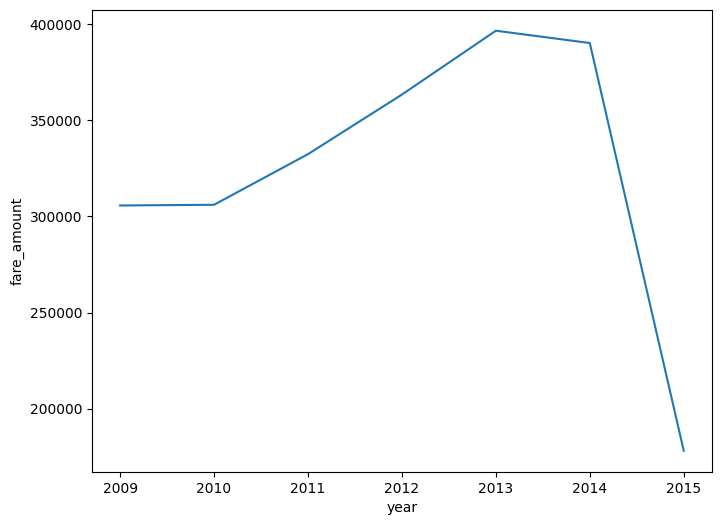

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.lineplot(x="year", y="fare_amount", data=df_dt.groupby("year")["fare_amount"].sum().reset_index())

There is steady increase in cumulative fare amount from 2010 to 2013.

The low  cumulative fare amount in 2015 is understandable since there is only 6 month of data


###Lineplot of average uber fares month after month for each year

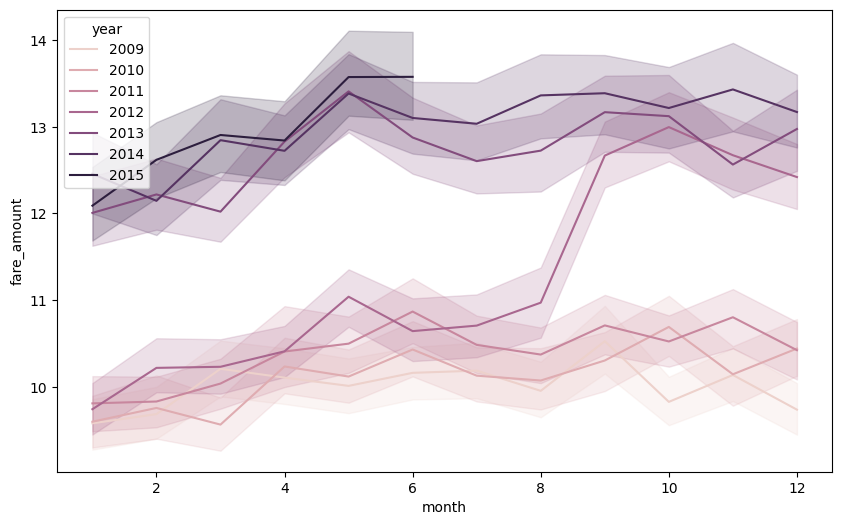

In [14]:
sns.lineplot(data = df_dt, x = "month", y = "fare_amount", hue = "year")
plt.show()

There is a sudden extreme increase in august 2012 that affect the fares amount in the next years

###Lineplot of average uber fares for every month in 2015

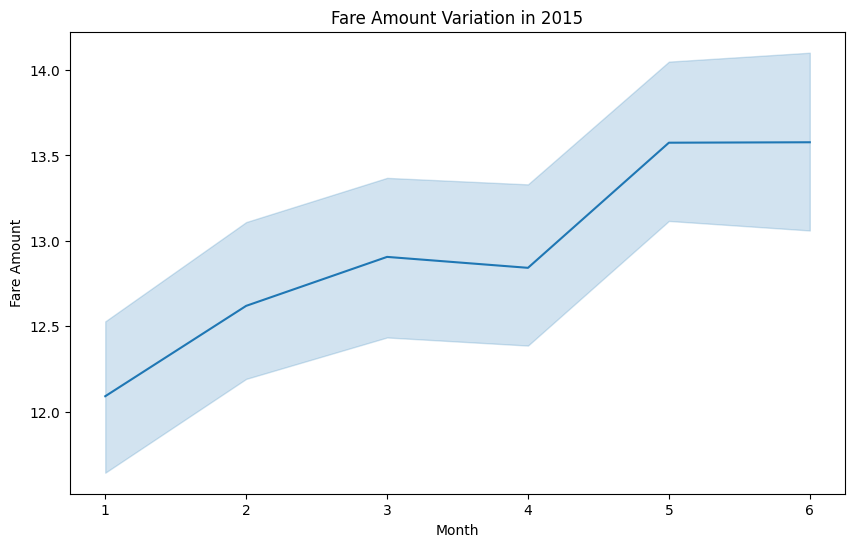

In [15]:
df_2015 = df_dt.loc[(df_dt["year"] == 2015)]
sns.lineplot(data=df_2015, x="month", y="fare_amount")
plt.xlabel("Month")
plt.ylabel("Fare Amount")
plt.title("Fare Amount Variation in 2015")
plt.show()

On the last year (2015) the fare amount value is steadily increase, except on april where there is a slight decrease in fare amount value

#Data Preparation

##Missing values and duplicated values

In [16]:
df.dropna(inplace=True)

In [17]:
df.duplicated().sum()

0

##Remove columns

In [18]:
(df["key"] - df["pickup_datetime"]).abs().max()

Timedelta('0 days 00:00:00.000000990')

In [19]:
df_tmp = df.drop(columns = ["Unnamed: 0", "key"]).copy()

##Data Cleaning

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fare_amount        199999 non-null  float64       
 1   pickup_datetime    199999 non-null  datetime64[ns]
 2   pickup_longitude   199999 non-null  float64       
 3   pickup_latitude    199999 non-null  float64       
 4   dropoff_longitude  199999 non-null  float64       
 5   dropoff_latitude   199999 non-null  float64       
 6   passenger_count    199999 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.2 MB


In [21]:
df_tmp.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
df_tmp.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


The fare amount value must not be negative.

The longitude value must not be less than -180 or greater than 180.

The latitude value must not be less than -90 or greater than 90.

In [23]:
#Remove negative fare amount values
df_tmp = df_tmp[~(df_tmp["fare_amount"] < 0)]

In [24]:
#Remove impossible longitude and latitude value
unusual_1 = ((df_tmp["pickup_longitude"] >= 180) | (df_tmp["pickup_longitude"] <= -180) |
 (df_tmp["dropoff_longitude"] >= 180) | (df_tmp["dropoff_longitude"] <= -180) | (df_tmp["pickup_latitude"] >= 90) |
  (df_tmp["pickup_latitude"] <= -90) | (df_tmp["dropoff_latitude"] >= 90) | (df_tmp["dropoff_latitude"] <= -90))
df_tmp = df_tmp[~unusual_1]

##Add columns

In [25]:
#Add new columns that represent date and time

df_tmp['year'] = df_tmp.pickup_datetime.dt.year
df_tmp['month'] = df_tmp.pickup_datetime.dt.month
df_tmp["day"] = df_tmp.pickup_datetime.dt.day
df_tmp['weekday'] = df_tmp.pickup_datetime.dt.weekday
df_tmp['hour'] = df_tmp.pickup_datetime.dt.hour


In [26]:
#Add new column for distance

distance = []
for a in df_tmp.index :
  loc1=(df_tmp.pickup_latitude[a], df_tmp.pickup_longitude[a])
  loc2=(df_tmp.dropoff_latitude[a], df_tmp.dropoff_longitude[a])
  distance.append(hs.haversine(loc1,loc2,unit=Unit.KILOMETERS))

df_tmp["Distance_in_Km"] = distance

In [27]:
df_tmp.drop(columns = "pickup_datetime", inplace = True)

##Data Cleaning

In [28]:
#Remove rows with 0 distance
df_tmp = df_tmp[~(df_tmp["Distance_in_Km"] == 0)]

In [29]:
#Remove rows with 0 passenger count
df_tmp = df_tmp[~(df_tmp["passenger_count"] == 0)]

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193648 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193648 non-null  float64
 1   pickup_longitude   193648 non-null  float64
 2   pickup_latitude    193648 non-null  float64
 3   dropoff_longitude  193648 non-null  float64
 4   dropoff_latitude   193648 non-null  float64
 5   passenger_count    193648 non-null  int64  
 6   year               193648 non-null  int64  
 7   month              193648 non-null  int64  
 8   day                193648 non-null  int64  
 9   weekday            193648 non-null  int64  
 10  hour               193648 non-null  int64  
 11  Distance_in_Km     193648 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.2 MB


In [31]:
df_tmp.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,Distance_in_Km
count,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000,193648.000000
mean,11.363009,-73.827248,40.647215,-73.837397,40.651442,1.690846,2011.748642,6.282606,15.704670,3.049611,13.489228,20.954159
std,9.757226,3.654903,2.931810,3.538054,2.903128,1.387206,1.862828,3.439963,8.687179,1.946530,6.515977,382.754731
min,0.000000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000084
25%,6.000000,-73.992270,40.736345,-73.991592,40.735215,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.281982
50%,8.500000,-73.982115,40.753242,-73.980538,40.753704,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.185056
75%,12.500000,-73.968395,40.767505,-73.965409,40.768307,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.960757
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,8782.910738


In [32]:
df_tmp.nunique()

fare_amount            1202
pickup_longitude      70431
pickup_latitude       83207
dropoff_longitude     76243
dropoff_latitude      89939
passenger_count           7
year                      7
month                    12
day                      31
weekday                   7
hour                     24
Distance_in_Km       193640
dtype: int64

In [33]:
nu = df_tmp.drop(["fare_amount"], axis=1).nunique().sort_values()
nf = []; cf = [] #numerical & categorical features

for i in range(df_tmp.drop(["fare_amount"], axis=1).shape[1]):
    if nu.values[i]<=35:
      cf.append(nu.index[i])
    else:
      nf.append(nu.index[i])
print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 6 categorical features.


In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193648 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193648 non-null  float64
 1   pickup_longitude   193648 non-null  float64
 2   pickup_latitude    193648 non-null  float64
 3   dropoff_longitude  193648 non-null  float64
 4   dropoff_latitude   193648 non-null  float64
 5   passenger_count    193648 non-null  int64  
 6   year               193648 non-null  int64  
 7   month              193648 non-null  int64  
 8   day                193648 non-null  int64  
 9   weekday            193648 non-null  int64  
 10  hour               193648 non-null  int64  
 11  Distance_in_Km     193648 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.2 MB


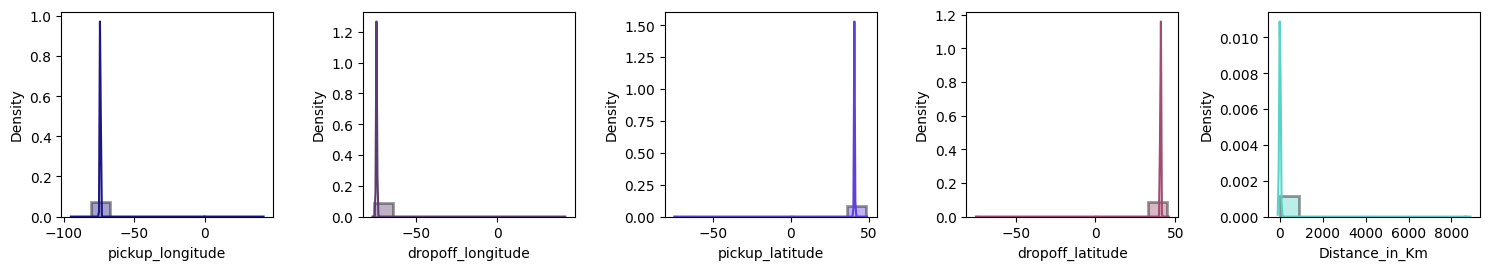

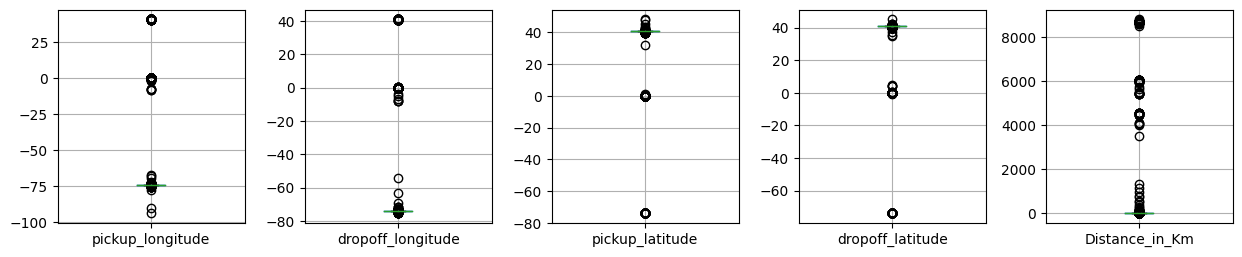

In [35]:
#Data distribution visualization to observe the data distribution against outliers.

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df_tmp[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n+1,i+1)
    df_tmp.boxplot(nf[i])
plt.tight_layout()
plt.show()

There are too many outliers

In [36]:
#Removal of outliers:

df_tmp2 = df_tmp.copy()

for i in nf:
    Q1 = df_tmp2[i].quantile(0.25)
    Q3 = df_tmp2[i].quantile(0.75)
    IQR = Q3 - Q1
    df_tmp2 = df_tmp2[df_tmp2[i] <= (Q3+(1.5*IQR))]
    df_tmp2 = df_tmp2[df_tmp2[i] >= (Q1-(1.5*IQR))]
    df_tmp2 = df_tmp2.reset_index(drop=True)
display(df_tmp2.head())
print('Before removal of outliers, The dataset had {} samples.'.format(df_tmp.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df_tmp2.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,Distance_in_Km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,1.661686
4,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2012,2,17,4,9,2.332714


Before removal of outliers, The dataset had 193648 samples.
After removal of outliers, The dataset now has 161023 samples.


In [37]:
df_tmp2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,Distance_in_Km
count,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000,161023.000000
mean,8.551097,-73.981879,40.752805,-73.981010,40.752958,1.689268,2011.733597,6.269440,15.696143,3.026735,13.666861,2.209182
std,4.365307,0.015874,0.020812,0.016571,0.021827,1.402425,1.864951,3.450068,8.676740,1.935111,6.329083,1.338788
min,0.000000,-74.027303,40.692445,-74.029404,40.690284,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000084
25%,5.700000,-73.992663,40.738510,-73.992125,40.738477,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.175949
50%,7.700000,-73.982840,40.753511,-73.982060,40.754013,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,1.886864
75%,10.500000,-73.971640,40.766447,-73.970749,40.766872,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,2.966286
max,499.000000,-73.932594,40.811272,-73.928977,40.814223,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,6.149660


In [38]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161023 entries, 0 to 161022
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        161023 non-null  float64
 1   pickup_longitude   161023 non-null  float64
 2   pickup_latitude    161023 non-null  float64
 3   dropoff_longitude  161023 non-null  float64
 4   dropoff_latitude   161023 non-null  float64
 5   passenger_count    161023 non-null  int64  
 6   year               161023 non-null  int64  
 7   month              161023 non-null  int64  
 8   day                161023 non-null  int64  
 9   weekday            161023 non-null  int64  
 10  hour               161023 non-null  int64  
 11  Distance_in_Km     161023 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 14.7 MB


In [39]:
print('The original dataset had {} samples.'.format(df.shape[0]))
print('After data cleaning, The dataset now has {} samples.'.format(df_tmp2.shape[0]))

The original dataset had 199999 samples.
After data cleaning, The dataset now has 161023 samples.


In [40]:
df_tmp2.nunique()

fare_amount             394
pickup_longitude      59113
pickup_latitude       71674
dropoff_longitude     60887
dropoff_latitude      73973
passenger_count           7
year                      7
month                    12
day                      31
weekday                   7
hour                     24
Distance_in_Km       161019
dtype: int64

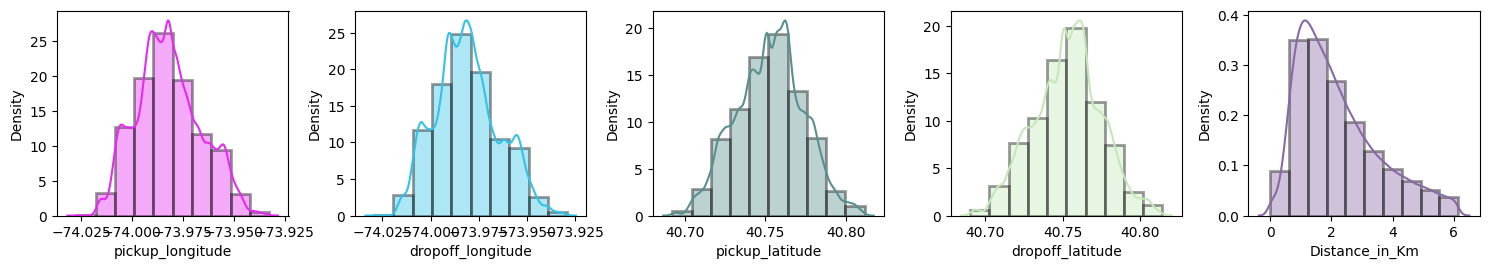

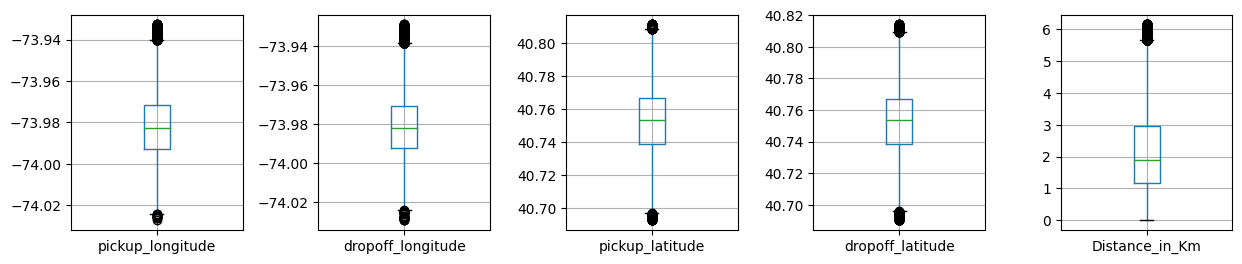

In [41]:
#Data distribution visualization to observe the data distribution after the removal of outliers.

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df_tmp2[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n+1,i+1)
    df_tmp2.boxplot(nf[i])
plt.tight_layout()
plt.show()

The 'Distance in Km' column is negatively skewed, so we are going to use logarithm transformation to make it more normally distributed

In [42]:
df_tmp2 = df_tmp2[~(df_tmp2["Distance_in_Km"] <= 0)]

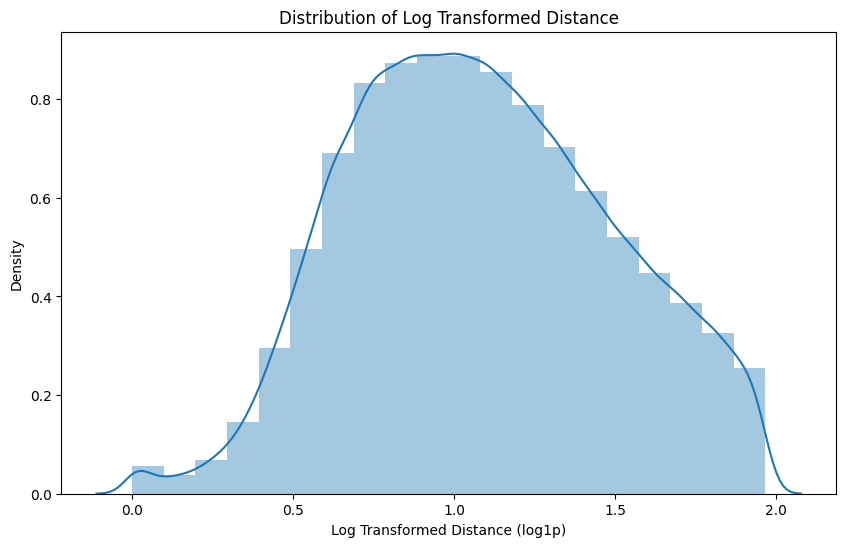

In [43]:
sns.distplot(np.log1p(df_tmp2["Distance_in_Km"]), bins=20)
plt.title('Distribution of Log Transformed Distance')
plt.xlabel('Log Transformed Distance (log1p)')
plt.ylabel('Density')
plt.show()

In [44]:
#Logarithm transformation on Distance
df_tmp2["Distance_in_Km"] = np.log1p(df_tmp2["Distance_in_Km"])

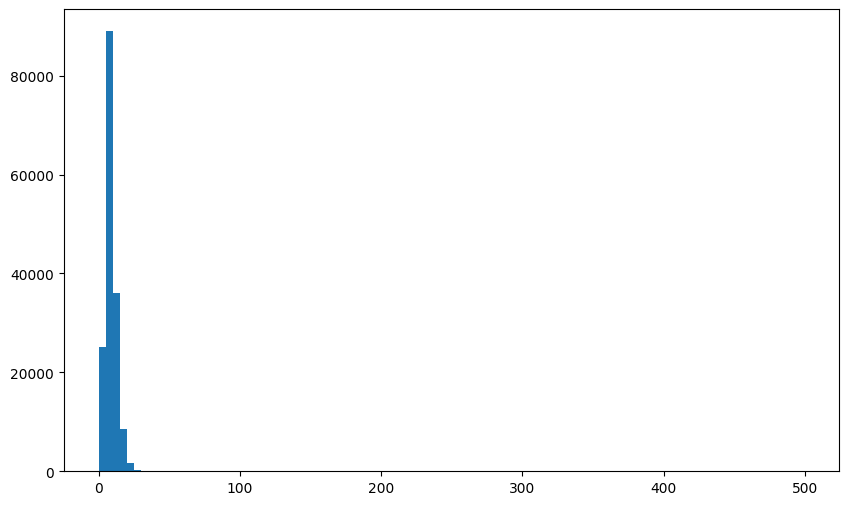

In [45]:
plt.hist(df_tmp2["fare_amount"], bins = 100)
plt.show()

The 'fare amount' column is extremly negatively skewed, so we are going to use logarithm transformation to make it more normally distributed so the model can predict it more efficiently

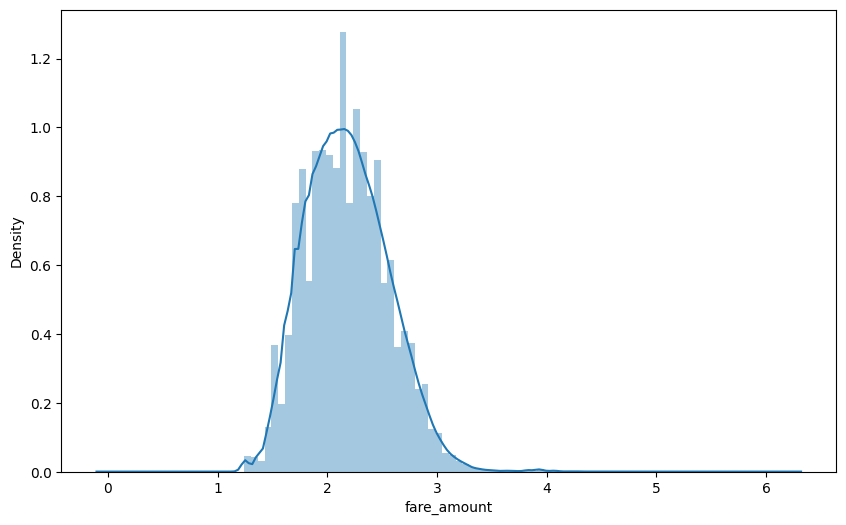

In [46]:
sns.distplot(np.log1p(df_tmp2["fare_amount"]), bins = 100)
plt.show()

In [47]:
#Logarithm transformation on fare amount
df_tmp2["fare_amount"] = np.log1p(df_tmp2["fare_amount"])

In [48]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161023 entries, 0 to 161022
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        161023 non-null  float64
 1   pickup_longitude   161023 non-null  float64
 2   pickup_latitude    161023 non-null  float64
 3   dropoff_longitude  161023 non-null  float64
 4   dropoff_latitude   161023 non-null  float64
 5   passenger_count    161023 non-null  int64  
 6   year               161023 non-null  int64  
 7   month              161023 non-null  int64  
 8   day                161023 non-null  int64  
 9   weekday            161023 non-null  int64  
 10  hour               161023 non-null  int64  
 11  Distance_in_Km     161023 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 16.0 MB


##Split data

In [49]:
#Split data train and test
target = "fare_amount"

x = df_tmp2.drop([target],axis=1)
y = df_tmp2[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=25)
x_train.reset_index(drop=True,inplace=True)

print('Original set  ---> ',x.shape,y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (161023, 11) (161023,) 
Training set  --->  (128818, 11) (128818,) 
Testing set   --->  (32205, 11)  (32205,)


##Standardization

In [50]:
scaler = StandardScaler()

x_train_scld = scaler.fit_transform(x_train)
x_train_scld = pd.DataFrame(x_train_scld, columns=x_train.columns)

x_test_scld = scaler.transform(x_test)
x_test_scld = pd.DataFrame(x_test_scld, columns=x_test.columns)

In [51]:
x_train_scld.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,Distance_in_Km
0,-0.687216,-0.476062,0.063072,0.005372,-0.526955,1.214520,-0.949365,1.072678,-1.048501,-0.735650,-0.345228
1,-0.804050,-0.117092,-0.418543,0.735234,-0.526955,1.214520,-0.369766,-0.310614,-1.048501,-0.261627,0.157706
2,0.240909,-0.334511,0.524290,0.025771,-0.526955,-0.930672,1.369029,0.842129,-1.048501,-0.577642,-0.982345
3,-1.540032,-0.395436,-0.452336,0.748161,-0.526955,-0.930672,1.079230,0.035209,1.019318,-0.103619,0.828032
4,-0.613794,-0.139531,-1.410859,-0.773355,-0.526955,0.678222,0.209832,0.381032,0.502363,0.054389,-0.067360


In [52]:
x_train_scld.nunique()

pickup_longitude      54264
pickup_latitude       64485
dropoff_longitude     55783
dropoff_latitude      66231
passenger_count           6
year                      7
month                    12
day                      31
weekday                   7
hour                     24
Distance_in_Km       128814
dtype: int64

#Evaluation

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=x_train_scld, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128818 entries, 0 to 128817
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   128818 non-null  float64
 1   pickup_latitude    128818 non-null  float64
 2   dropoff_longitude  128818 non-null  float64
 3   dropoff_latitude   128818 non-null  float64
 4   passenger_count    128818 non-null  int64  
 5   year               128818 non-null  int64  
 6   month              128818 non-null  int64  
 7   day                128818 non-null  int64  
 8   weekday            128818 non-null  int64  
 9   hour               128818 non-null  int64  
 10  Distance_in_Km     128818 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 10.8 MB


In [55]:
#Train data Evaluation
LR = LinearRegression()
a = test_model(LR)

print("R2 cross validation score for linear regression model with train data", a)

R2 cross validation score for linear regression model with train data [0.6309137856679168]


In [56]:
#Train data evaluation
ridge = Ridge()
a = test_model(ridge)

print("R2 csross validation score for ridge regression model with train data", a)


R2 csross validation score for ridge regression model with train data [0.630913786675871]


In [57]:
#Train data evaluation
lasso = Lasso(alpha=1e-4)
a = test_model(lasso)

print("R2 csross validation score for lasso regression model with train data", a)


R2 csross validation score for lasso regression model with train data [0.6309195007289061]


In [58]:
import xgboost

#Train data Evaluation
xgb_reg = xgboost.XGBRegressor()
a = test_model(xgb_reg)

print("R2 cross validation score for gradient boosting regression model with train data", a)


R2 cross validation score for gradient boosting regression model with train data [0.7319105286139573]


In [59]:
#Evaluation Mode function

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(x_train_scld.loc[:,x_train_scld.nunique()>50].columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predictions alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=y_train, x=x_train_scld[i], label='Actual')
        plt.scatter(y=pred1, x=x_train_scld[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(y_train, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_train, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(y_test, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_test-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_test, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_test, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(y_train-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(y_test-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((y_train - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(y_train,pred1)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

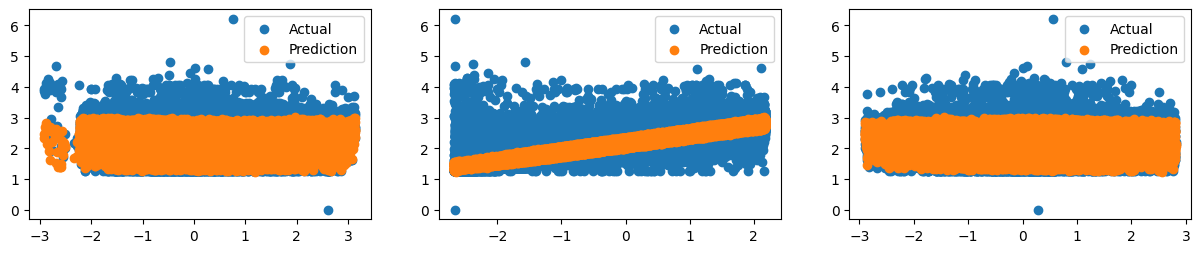



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6310543844638177
Residual Sum of Squares (RSS) on Training set  ---> 6818.989825631929
Mean Squared Error (MSE) on Training set       ---> 0.05293506983210366
Root Mean Squared Error (RMSE) on Training set ---> 0.23007622613408726

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6218223380531255
Residual Sum of Squares (RSS) on Training set  ---> 1733.1956766092685
Mean Squared Error (MSE) on Training set       ---> 0.053817595920176015
Root Mean Squared Error (RMSE) on Training set ---> 0.23198619769325937

--------------------Residual Plots--------------------


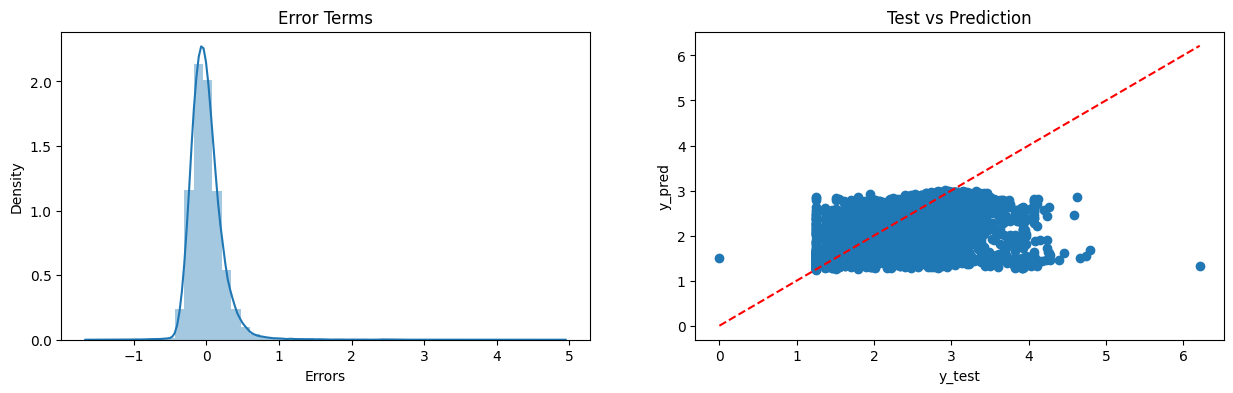

In [60]:
#Linear Regression

MLR = LinearRegression().fit(x_train_scld,y_train)
pred1 = MLR.predict(x_train_scld)
pred2 = MLR.predict(x_test_scld)

Evaluate(0, pred1, pred2)

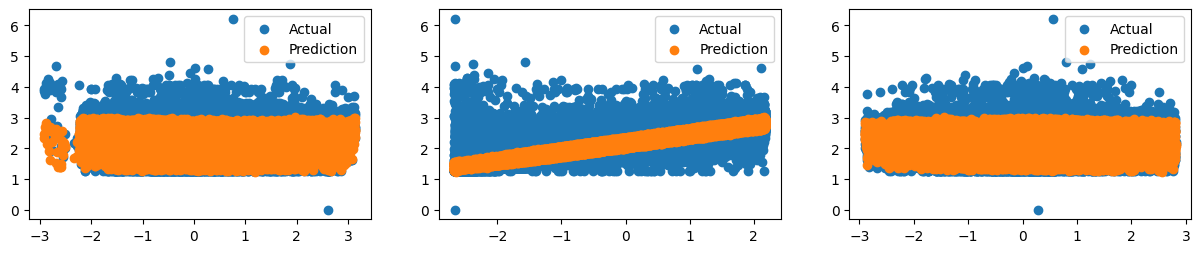



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6310543844255566
Residual Sum of Squares (RSS) on Training set  ---> 6818.989826339083
Mean Squared Error (MSE) on Training set       ---> 0.05293506983759322
Root Mean Squared Error (RMSE) on Training set ---> 0.23007622614601717

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.621822398852256
Residual Sum of Squares (RSS) on Training set  ---> 1733.195397965655
Mean Squared Error (MSE) on Training set       ---> 0.05381758726799115
Root Mean Squared Error (RMSE) on Training set ---> 0.23198617904519905

--------------------Residual Plots--------------------


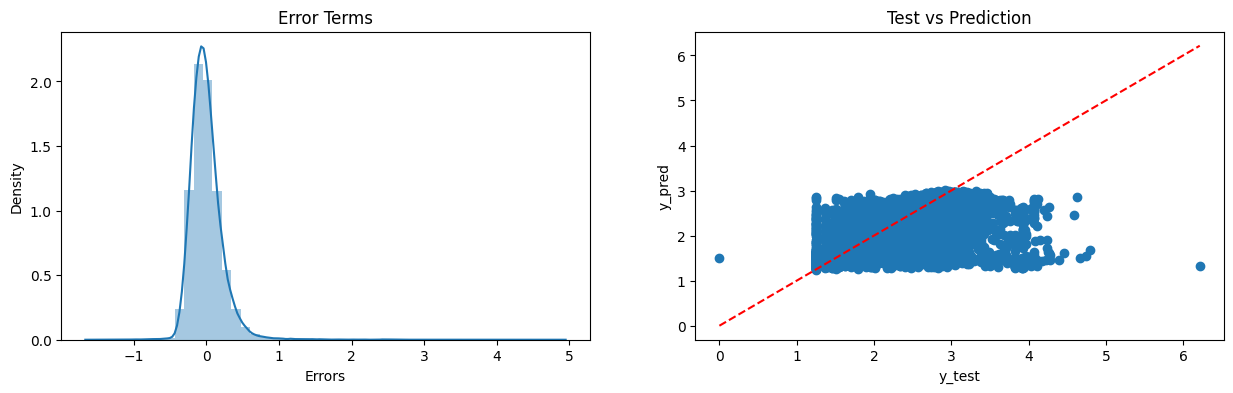

In [61]:
#Creating a Ridge Regression model

RR = Ridge().fit(x_train_scld,y_train)
pred1 = RR.predict(x_train_scld)
pred2 = RR.predict(x_test_scld)

Evaluate(1, pred1, pred2)

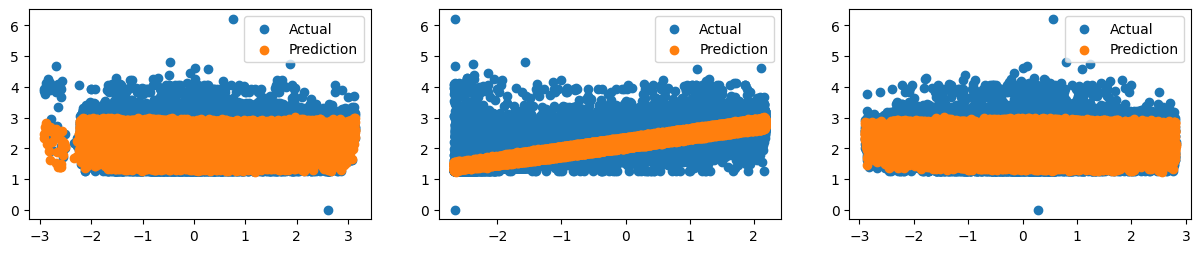



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6310526207687754
Residual Sum of Squares (RSS) on Training set  ---> 6819.022422898414
Mean Squared Error (MSE) on Training set       ---> 0.0529353228811068
Root Mean Squared Error (RMSE) on Training set ---> 0.23007677605770382

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6218281239787307
Residual Sum of Squares (RSS) on Training set  ---> 1733.1691595982093
Mean Squared Error (MSE) on Training set       ---> 0.0538167725383701
Root Mean Squared Error (RMSE) on Training set ---> 0.23198442305113962

--------------------Residual Plots--------------------


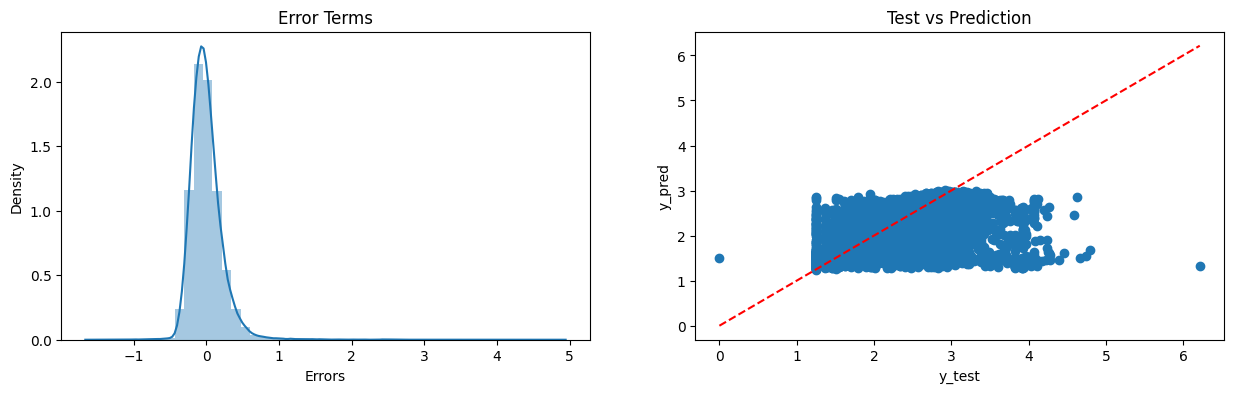

In [62]:
#Creating a Lasso Regression model

LLR = Lasso(alpha=1e-4).fit(x_train_scld,y_train)
pred1 = LLR.predict(x_train_scld)
pred2 = LLR.predict(x_test_scld)

Evaluate(2, pred1, pred2)

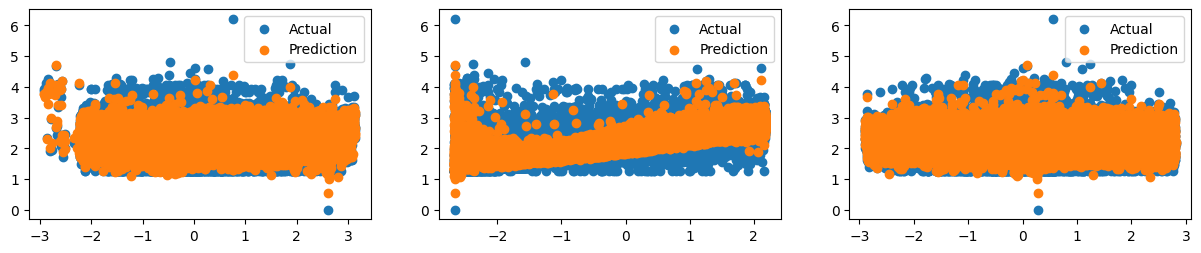



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8002889632722365
Residual Sum of Squares (RSS) on Training set  ---> 3691.1335171551023
Mean Squared Error (MSE) on Training set       ---> 0.028653864499954218
Root Mean Squared Error (RMSE) on Training set ---> 0.1692745240724493

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7271751195331151
Residual Sum of Squares (RSS) on Training set  ---> 1250.361803133342
Mean Squared Error (MSE) on Training set       ---> 0.03882508315893004
Root Mean Squared Error (RMSE) on Training set ---> 0.19704081597204684

--------------------Residual Plots--------------------


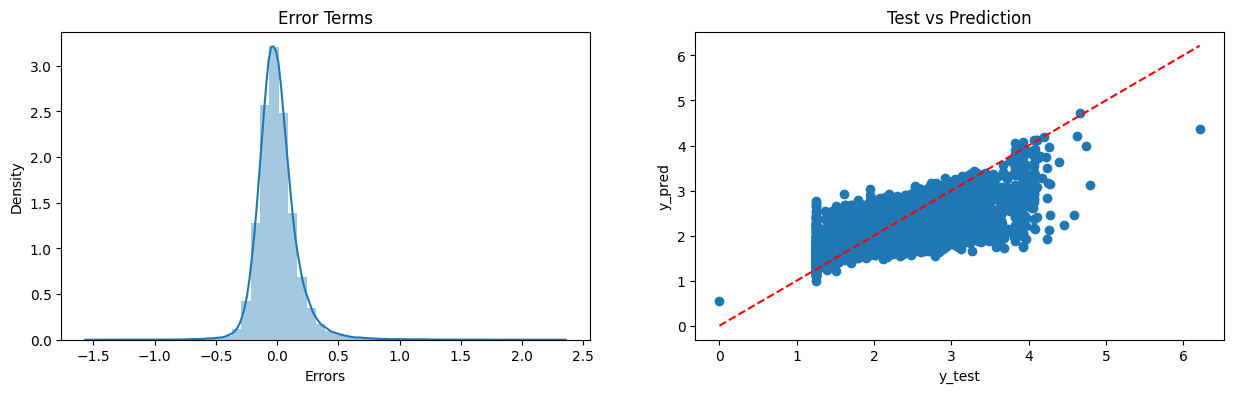

In [63]:
#Creating a gradient boosting Regression model

XGB = xgboost.XGBRegressor().fit(x_train_scld,y_train)
pred1 = XGB.predict(x_train_scld)
pred2 = XGB.predict(x_test_scld)

Evaluate(2, pred1, pred2)

Digunakan model Linear Regression sesuai dengan permintaan Final Project

#Modelling

In [64]:
def basic_model(model, x_train, y_train):
  clf = model
  return clf.fit(x_train, y_train)

In [65]:
#Code for modelling
model_reg = basic_model(xgboost.XGBRegressor(), x_train_scld, y_train)


In [66]:
joblib.dump((model_reg, scaler), 'model_with_scaler.joblib')

['model_with_scaler.joblib']